This is a notebook for plotting the development of the prominence of the rhythm of a bee and the share of beeing circadian over different age groups.

# Imports

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("figure_panel_1.ipynb").resolve().parents[1]))

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
import datetime
import pytz
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib import ticker
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter
import scipy
import os

import bb_rhythm.plotting
import bb_rhythm.utils
import bb_rhythm.rhythm

import path_settings

In [3]:
sns.set_style("ticks")
sns.set_palette(sns.color_palette("colorblind"))
matplotlib.rcParams.update({'font.size': 5, 'ytick.major.size': 1,
                                'ytick.major.width': 0.4, 'font.sans-serif': 'Arial'})

# Data

In [4]:
# movement speeds
velocity_df_2016 = pd.read_csv(path_settings.MEAN_VELOCITY_DF_PATH_2016)

In [5]:
# movement speeds
velocity_df_2019 = pd.read_csv(path_settings.MEAN_VELOCITY_DF_PATH_2019)
velocities_young = pd.read_csv(path_settings.VELOCITY_5101_DF_PATH_2019)
velocities_old = pd.read_csv(path_settings.VELOCITY_2088_DF_PATH_2019)

In [6]:
# cosinor fit data for period 2016
cosinor_df_2016 = pd.read_csv(path_settings.COSINOR_DF_PATH_2016)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2016["is_circadian"] = cosinor_df_2016.p_value < 0.05

In [7]:
# cosinor fit data for period 2019
cosinor_df_2019 = pd.read_csv(path_settings.COSINOR_DF_PATH_2019)

# define bees being circadian with results of zero amplitude test being < 0.05
cosinor_df_2019["is_circadian"] = cosinor_df_2019.p_value < 0.05

In [8]:
# aggregated cosinor estimates per hive position
dist_exit_df_2016 = pd.read_csv(path_settings.DIST_EXIT_SIDE_0_DF_PATH_2016)

In [9]:
# aggregated cosinor estimates per hive position
dist_exit_df_2019 = pd.read_csv(path_settings.DIST_EXIT_SIDE_0_DF_PATH_2019)

In [10]:
# image of hive frame 2019
frame = cv2.imread(os.path.join('imgs', 'frame.png'))

# Panel figures

## a) Mean movement speed over time

### 2016

In [16]:
# add age bins
binning = bb_rhythm.utils.Binning(bin_name="Age [days]", bin_parameter="age")
df_2016_plt = binning.add_bins_to_df(cosinor_df_2016.dropna().copy(), bins=[0, 4, 9, 14, 19, 24, 29, 34], step_size=None)
binning = bb_rhythm.utils.Binning(bin_name="Age [days]", bin_parameter="age")
velocity_df_2016 = binning.add_bins_to_df(velocity_df_2016, bins=[0, 4, 9, 14, 19, 24, 29, 34])

# create color palette from age bins
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_2016_plt["Age [days]"].unique()), "Age [days]", df_2016_plt
    )[::-1]

# get speed subset from time window
dt_from = pd.to_datetime(datetime.datetime(2016, 8, 4), utc=True)
dt_to = pd.to_datetime(datetime.datetime(2016, 8, 7), utc=True)
velocity_df_2016["date"] = pd.to_datetime(velocity_df_2016["date"])
velocity_df_2016_subperiod = velocity_df_2016[((velocity_df_2016["date"] >= dt_from) & (velocity_df_2016["date"] < dt_to))].copy()

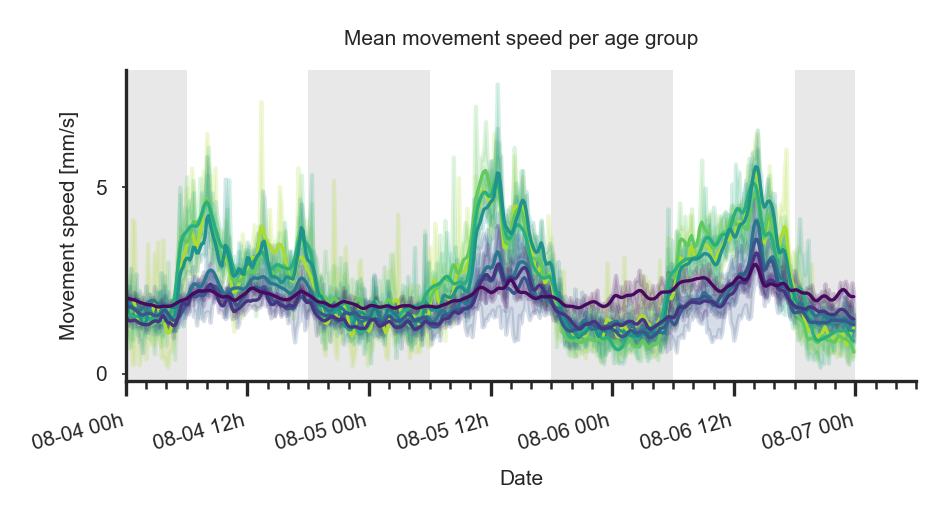

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(3.4, 1.35), dpi=300)

# add grey bars indicating nighttime
bb_rhythm.plotting.add_grey_nighttime_bars(axs, velocity_df_2016_subperiod)

# plot smoothed velocities
bb_rhythm.plotting.plot_smoothed_age_velocity_over_time(
    axs, 
    palette, 
    "Age [days]", 
    velocity_df_2016_subperiod, 
    hue_order=sorted(df_2016_plt["Age [days]"].unique())[::-1],
    linewidth=0.8,
)

# x-axis settings
axs.set_xlim(dt_from, dt_to + datetime.timedelta(hours=6))
date_form = matplotlib.dates.DateFormatter("%m-%d %Hh")
axs.xaxis.set_major_formatter(date_form)
axs.xaxis.set_minor_locator(mdates.HourLocator(byhour=[2, 4, 6, 8, 10, 14, 16, 18, 20, 22]))
axs.set_xlabel("Date")
axs.set_xticks(axs.get_xticks().tolist())
axs.set_xticklabels(axs.get_xticklabels(), rotation=15, ha='right')

# y-axis settings
axs.set_ylabel('Movement speed [mm/s]')
axs.yaxis.set_major_locator(ticker.MultipleLocator(5))

# legend settings
axs.legend().remove()

# figure settings
axs.set_title("Mean movement speed per age group", fontsize=rcParams['axes.labelsize'])
axs.tick_params(which='minor', length=2)
sns.despine(ax=axs)

# save fig
plt.savefig(os.path.join("imgs", "panel_1_a_2016.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_a_2016.png"), bbox_inches="tight")

### 2019

In [18]:
# add age bins
binning = bb_rhythm.utils.Binning(bin_name="Age [days]", bin_parameter="age")
df_2019_plt = binning.add_bins_to_df(cosinor_df_2019.dropna().copy(), bins=[0, 4, 9, 14, 19, 24, 29, 34], step_size=None)
binning = bb_rhythm.utils.Binning(bin_name="Age [days]", bin_parameter="age")
velocity_df_2019 = binning.add_bins_to_df(velocity_df_2019, bins=[0, 4, 9, 14, 19, 24, 29, 34])

# create color palette from age bins
palette = bb_rhythm.plotting.create_age_color_palette(
        sorted(df_2019_plt["Age [days]"].unique()), "Age [days]", df_2019_plt
    )[::-1]

# get speed subset from time window
dt_from = pd.to_datetime(datetime.datetime(2019, 9, 11), utc=True)
dt_to = pd.to_datetime(datetime.datetime(2019, 9, 14), utc=True)
velocity_df_2019["date"] = pd.to_datetime(velocity_df_2019["date"])
velocity_df_2019_subperiod = velocity_df_2019[((velocity_df_2019["date"] >= dt_from) & (velocity_df_2019["date"] < dt_to))].copy()

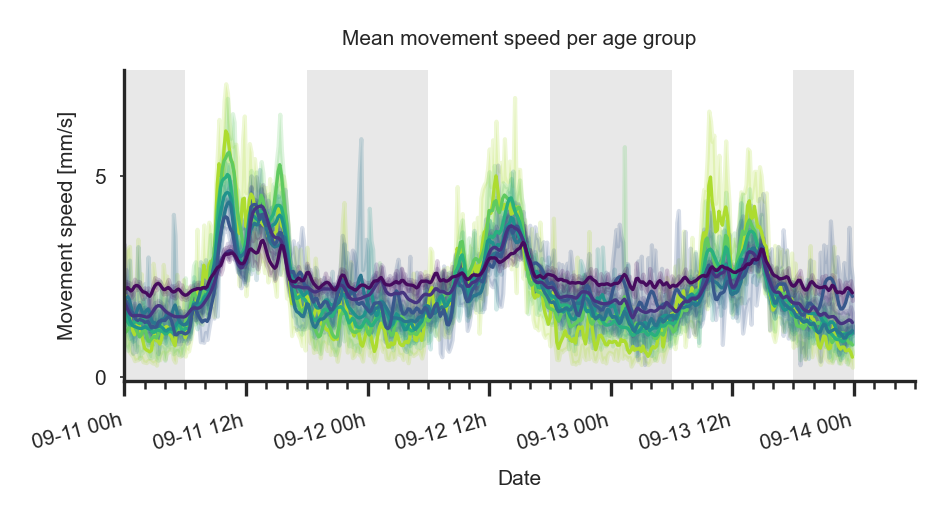

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(3.4, 1.35), dpi=300)

# add grey bars indicating nighttime
bb_rhythm.plotting.add_grey_nighttime_bars(axs, velocity_df_2019_subperiod)

# plot smoothed velocities
bb_rhythm.plotting.plot_smoothed_age_velocity_over_time(
    axs, 
    palette, 
    "Age [days]", 
    velocity_df_2019_subperiod, 
    hue_order=sorted(df_2019_plt["Age [days]"].unique())[::-1],
    linewidth=0.8,
)

# x-axis settings
axs.set_xlim(dt_from, dt_to + datetime.timedelta(hours=6))
date_form = matplotlib.dates.DateFormatter("%m-%d %Hh")
axs.xaxis.set_major_formatter(date_form)
axs.xaxis.set_minor_locator(mdates.HourLocator(byhour=[2, 4, 6, 8, 10, 14, 16, 18, 20, 22]))
axs.set_xlabel("Date")
axs.set_xticks(axs.get_xticks().tolist())
axs.set_xticklabels(axs.get_xticklabels(), rotation=15, ha='right')

# y-axis settings
axs.set_ylabel('Movement speed [mm/s]')
axs.yaxis.set_major_locator(ticker.MultipleLocator(5))

# legend settings
axs.legend().remove()

# figure settings
axs.set_title("Mean movement speed per age group", fontsize=rcParams['axes.labelsize'])
axs.tick_params(which='minor', length=2)
sns.despine(ax=axs)

# save fig
plt.savefig(os.path.join("imgs", "panel_1_a_2019.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_a_2019.png"), bbox_inches="tight")

## b) Individual movement speed and cosinor fit

### 2019

In [7]:
day = datetime.datetime(2019, 9, 12, 12, tzinfo=pytz.utc)
round_up_to = '3600s'
ylim = (-0.5, 12.6)

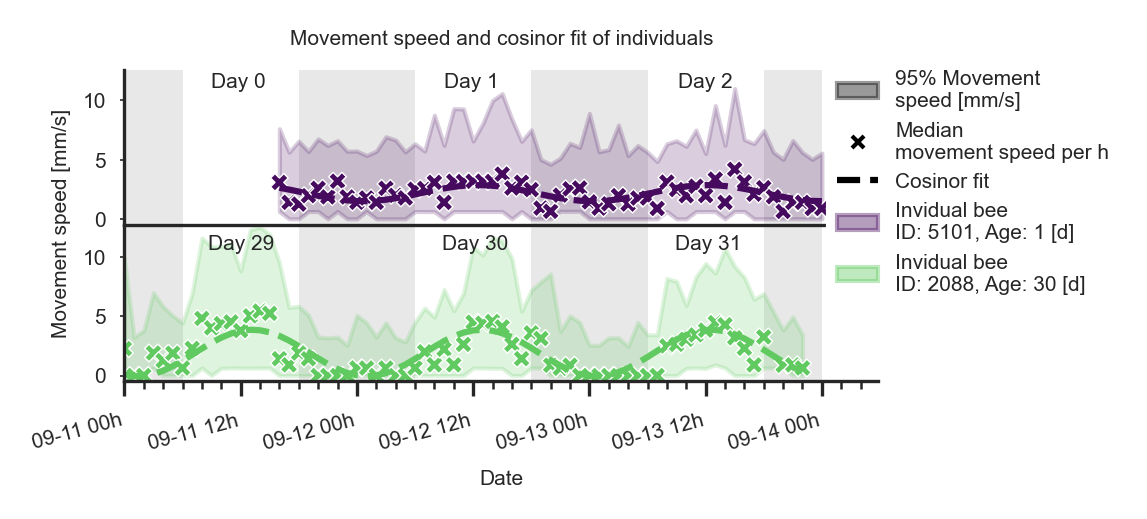

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(3.243, 1.35), gridspec_kw={'height_ratios': [0.5, 0.5], 'hspace': 0.01}, dpi=300)

# plot cosinor fit
bb_rhythm.plotting.plot_cosinor_with_velocities(axs[0], velocities_young, velocity_df_2019_subperiod, palette[0], day, cosinor_df_2019, 5101, round_up_to, ylim, set_xticks=False)
bb_rhythm.plotting.plot_cosinor_with_velocities(axs[1], velocities_old, velocity_df_2019_subperiod, palette[6], day, cosinor_df_2019, 2088, round_up_to, ylim, set_xticks=True)

# x-axis settings
axs[0].set_xlabel("")
axs[0].set_xticks([]) 
axs[0].set_xticklabels([])
axs[0].tick_params(bottom=False) 

# y-axis settings
axs[0].set_ylabel("")
axs[1].set_ylabel("")

# legend settings
legends = [
    (mpatches.Patch(color='black', alpha=0.4), '95% Movement\nspeed [mm/s]'), 
    ((mlines.Line2D([], [], color='black', marker='x', linewidth=0, markersize=3)), "Median\nmovement speed per h"), 
    ((mlines.Line2D([], [], color='black', linestyle='--')), 'Cosinor fit'),
    (mpatches.Patch(color=palette[0], alpha=0.4), 'Invidual bee\nID: 5101, Age: 1 [d]'),
    (mpatches.Patch(color=palette[6], alpha=0.4), 'Invidual bee\nID: 2088, Age: 30 [d]'),
]
leg = axs[0].legend(*zip(*legends), loc='center left', bbox_to_anchor=(0.92, 0.275), framealpha=1.0, edgecolor=(1.0, 1.0, 1.0, 1.0))
axs[1].set_zorder(-1)
axs[1].get_legend().remove()

# add day information to plot
fig.text(0.245, 0.85, 'Day 0 ', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.485, 0.85, 'Day 1 ', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.725, 0.85, 'Day 2 ', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.245, 0.45, 'Day 29', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.485, 0.45, 'Day 30', va='center', ha='center', fontsize=rcParams['axes.labelsize'])
fig.text(0.725, 0.45, 'Day 31', va='center', ha='center', fontsize=rcParams['axes.labelsize'])

# plot settings
fig.text(0.06, 0.5, 'Movement speed [mm/s]', va='center', ha='center', fontsize=rcParams['axes.labelsize'], rotation='vertical')
sns.despine()

# save fig
plt.savefig(os.path.join("imgs", "panel_1_b_2019.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_b_2019.png"), bbox_inches="tight")

## c) Spatial age distribution in hive

### 2016

In [32]:
dist_exit_df_2016["x_pos_start_focal"] = dist_exit_df_2016["x_pos_start_focal"].round()
dist_exit_df_2016["y_pos_start_focal"] = dist_exit_df_2016["y_pos_start_focal"].round()
entrance_coordinates = (0, 250)

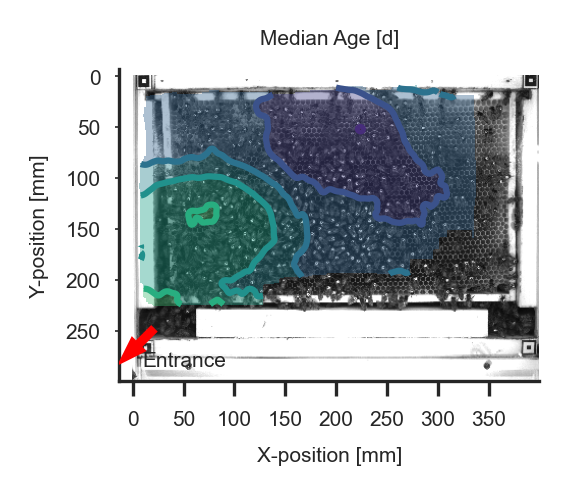

In [33]:
fig, axs = plt.subplots(1, 1, figsize=(3.24, 1.35), dpi=300)

# plot underlying hive frame image
axs.imshow(scipy.ndimage.zoom(frame[:, :, 0], 0.1), cmap='gray', vmin=0, vmax=255)

# add arrow es marker for exit
axs.text(10, 270, 'Entrance', va='top', ha='left', fontsize=rcParams['axes.labelsize'])
axs.arrow(x=5 + 15, y=264 - 15, dx=-15, dy=15, color='red', zorder=10, width=5)

# plot density for age distribution
X, Y = np.meshgrid(sorted(dist_exit_df_2016.x_pos_start_focal.unique()),
                   sorted(dist_exit_df_2016.y_pos_start_focal.unique()))
x = "y_pos_start_focal"
y = "x_pos_start_focal"
Z = dist_exit_df_2016.pivot_table(index=x, columns=y, values="age_focal_median", aggfunc=np.nanmedian, dropna=False)
Z = gaussian_filter(Z, 3)
cp = axs.contourf(X, Y, Z, cmap='viridis', levels=[0, 5, 10, 15, 20, 25, 30, 35, 40], alpha=0.4)
cp = axs.contour(X, Y, Z, cmap='viridis', levels=[0, 5, 10, 15, 20, 25, 30, 35, 40], alpha=1.0)

# x-axis setting
axs.set_xlabel("X-position [mm]")
axs.xaxis.set_major_locator(ticker.MultipleLocator(50))

# y-axis setting
axs.set_ylabel("Y-position [mm]")

# figure settings
axs.set_title("Median Age [d]", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs)

# save fig
plt.savefig(os.path.join("imgs", "panel_1_c_2016.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_c_2016.png"), bbox_inches="tight")

### 2019

In [34]:
dist_exit_df_2019["x_pos_start_focal"] = dist_exit_df_2019["x_pos_start_focal"].round()
dist_exit_df_2019["y_pos_start_focal"] = dist_exit_df_2019["y_pos_start_focal"].round()
exit_coordinates = (5, 264)

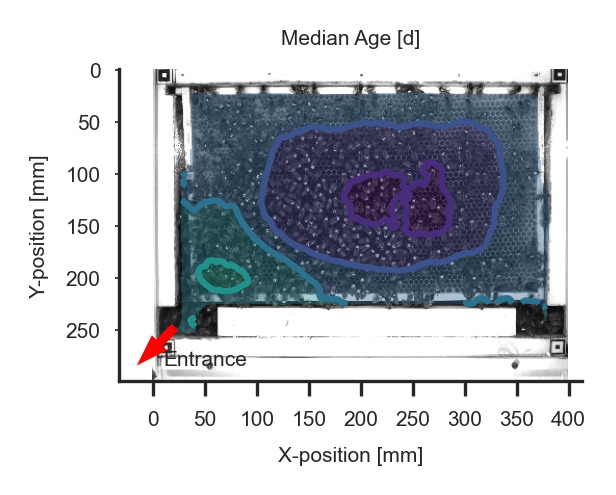

In [35]:
fig, axs = plt.subplots(1, 1, figsize=(3.24, 1.35), dpi=300)

# plot underlying hive frame image
axs.imshow(scipy.ndimage.zoom(frame[:, :, 0], 0.1), cmap='gray', vmin=0, vmax=255)

# add arrow es marker for exit
axs.text(10, 270, 'Entrance', va='top', ha='left', fontsize=rcParams['axes.labelsize'])
axs.arrow(x=5 + 15, y=264 - 15, dx=-15, dy=15, color='red', zorder=10, width=5)

# plot density for age distribution
X, Y = np.meshgrid(sorted(dist_exit_df_2019.x_pos_start_focal.unique()), sorted(dist_exit_df_2019.y_pos_start_focal.unique()))
x = "y_pos_start_focal"
y = "x_pos_start_focal"
Z = dist_exit_df_2019.pivot_table(index=x, columns=y, values="age_focal_median", aggfunc=np.nanmedian, dropna=False)
Z = gaussian_filter(Z, 3)
cp = axs.contourf(X, Y, Z, cmap='viridis', levels=[0, 5, 10, 15, 20, 25, 30, 35, 40], alpha=0.4)
cp = axs.contour(X, Y, Z, cmap='viridis', levels=[0, 5, 10, 15, 20, 25, 30, 35, 40], alpha=1.0)

# x-axis setting
axs.set_xlabel("X-position [mm]")
axs.xaxis.set_major_locator(ticker.MultipleLocator(50))

# y-axis setting
axs.set_ylabel("Y-position [mm]")

# figure settings
axs.set_title("Median Age [d]", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs)

# save fig
plt.savefig(os.path.join("imgs", "panel_1_c_2019.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_c_2019.png"), bbox_inches="tight")

## d) Share of rhythmic bees

### 2016

In [19]:
# bar plot dataframe
df_bar = df_2016_plt.groupby(["Age [days]"]).agg(
     no=("is_circadian", lambda x: 100),
     yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

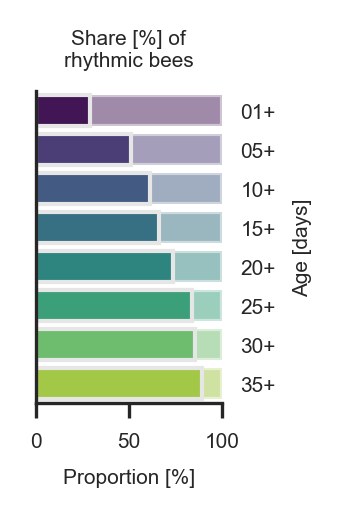

In [24]:
fig, axs = plt.subplots(1, 1, figsize=(0.8, 1.35), dpi=300)

# barplot
sns.barplot(data=df_bar, y="Age [days]", x="Non-circadian", ax=axs, hue="Age [days]", palette=palette, order=sorted(df_2016_plt["Age [days]"].unique()), alpha=0.5)
sns.barplot(data=df_bar, y="Age [days]", x="Circadian", ax=axs, hue="Age [days]", palette=palette, order=sorted(df_2016_plt["Age [days]"].unique()), edgecolor=".9")

# x-axis settings
axs.set_xlabel("Proportion [%]")
axs.set_xlim(0, 100.0)

# y-axis settings
axs.yaxis.set_label_position("right")
axs.yaxis.tick_right()
axs.tick_params(right=False)

# figure settings
axs.set_title("Share [%] of\nrhythmic bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs)
axs.grid(False)

# save
plt.savefig(os.path.join("imgs", "panel_1_d_2016.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_d_2016.png"), bbox_inches="tight")

### 2019

In [21]:
# bar plot dataframe
df_bar = df_2019_plt.groupby(["Age [days]"]).agg(
     no=("is_circadian", lambda x: 100),
     yes=("is_circadian", lambda x: x.sum() / x.count() * 100),
).rename(columns={"yes": "Circadian", "no": "Non-circadian"}).reset_index()

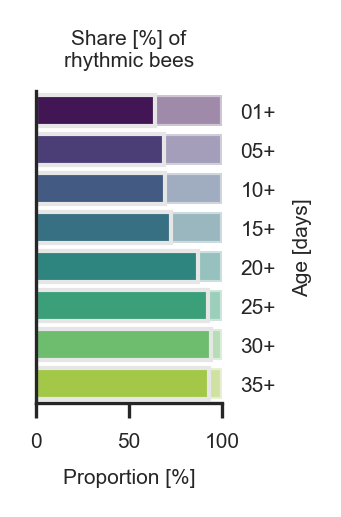

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(0.8, 1.35), dpi=300)

# barplot
sns.barplot(data=df_bar, y="Age [days]", x="Non-circadian", ax=axs, hue="Age [days]", palette=palette, order=sorted(df_2019_plt["Age [days]"].unique()), alpha=0.5)
sns.barplot(data=df_bar, y="Age [days]", x="Circadian", ax=axs, hue="Age [days]", palette=palette, order=sorted(df_2019_plt["Age [days]"].unique()), edgecolor=".9")

# x-axis settings
axs.set_xlabel("Proportion [%]")
axs.set_xlim(0, 100.0)

# y-axis settings
axs.yaxis.set_label_position("right")
axs.yaxis.tick_right()
axs.tick_params(right=False)

# figure settings
axs.set_title("Share [%] of\nrhythmic bees", fontsize=rcParams['axes.labelsize'])
sns.despine(ax=axs)
axs.grid(False)

# save
plt.savefig(os.path.join("imgs", "panel_1_d_2019.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_d_2019.png"), bbox_inches="tight")

## e) Cosinor estimates in relation to distance to hive exit

### 2016

In [11]:
# round dist_exit_df
dist_exit_df_2016["entrance_dist_median_round"] = dist_exit_df_2016["entrance_dist_focal_median"].round(-1)
dist_exit_df_2016 = dist_exit_df_2016.groupby(["entrance_dist_median_round"]).median().reset_index()

# filter for 95% CI of counts as there is one outlier
dist_exit_df_2016 = dist_exit_df_2016[dist_exit_df_2016["phase_focal_count"] > dist_exit_df_2016["phase_focal_count"].quantile(0.05)]

# min-max normalize median estimates and reverse for phase median and std and count
dist_exit_df_2016["phase_median_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2016["phase_focal_median"], reverse=True)
dist_exit_df_2016["phase_std_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2016["phase_focal_std"], reverse=True)
dist_exit_df_2016["r_squared_median_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2016["r_squared_focal_median"])
dist_exit_df_2016["age_median_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2016["age_focal_median"])
dist_exit_df_2016["count_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2016["phase_focal_count"], reverse=True)

In [24]:
dist_exit_df_2016["phase_std"]

KeyError: 'phase_std'

0.735


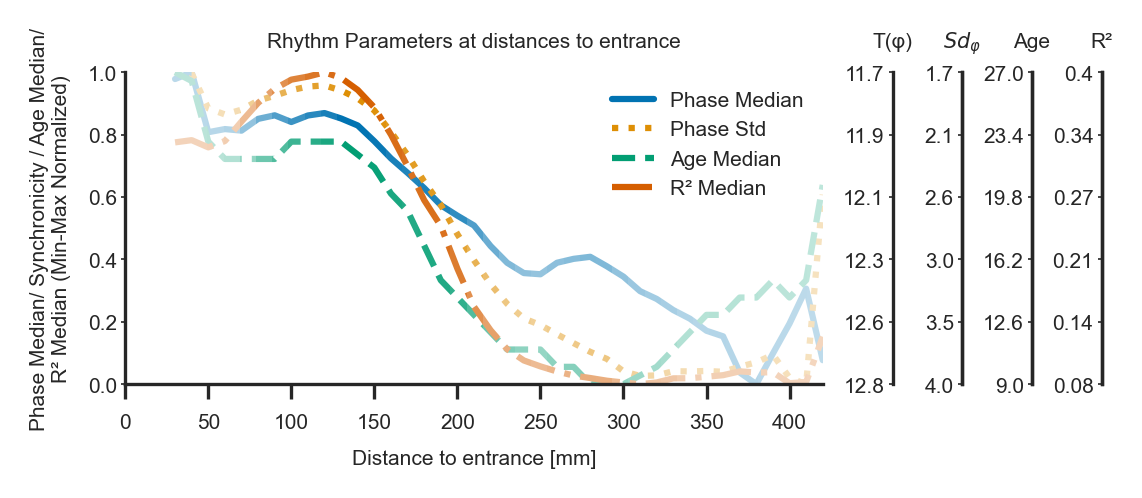

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(4.2, 1.35), gridspec_kw={"width_ratios":[1.0, 0.0, 0.0, 0.0, 0.0], "wspace": 0.5}, dpi=300)

# plot lines
sns.lineplot(dist_exit_df_2016, x="entrance_dist_median_round", y="phase_median_min_max", ax=axs[0], estimator="median", errorbar=None,
             label="Phase Median", markers=True)
sns.lineplot(dist_exit_df_2016, x="entrance_dist_median_round", y="phase_std_min_max", ax=axs[0], estimator="median",
             errorbar=None,
             label="Phase Std", linestyle="dotted", markers=True, dashes=False)
sns.lineplot(dist_exit_df_2016, x="entrance_dist_median_round", y="age_median_min_max", ax=axs[0], estimator="median", errorbar=None,
             label="Age Median", linestyle="dashed", markers=True, dashes=False)
sns.lineplot(dist_exit_df_2016, x="entrance_dist_median_round", y="r_squared_median_min_max", ax=axs[0], estimator="median",
             errorbar=None, label="R² Median", linestyle="dashdot", markers=True, dashes=False)

# whiten out areas with low sample sizes
bb_rhythm.plotting.whiten_out_low_sample_size_areas(axs[0], dist_exit_df_2016, "entrance_dist_median_round", "count_min_max")

# x-axis settings
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(50))
axs[0].set_xlim(0, dist_exit_df_2016["entrance_dist_median_round"].max())
axs[0].set_xlabel("Distance to entrance [mm]")
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(50))

# y-axis settings
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='y', which='major', pad=1)
axs[0].set_ylabel("Phase Median/ Synchronicity / Age Median/\nR² Median (Min-Max Normalized)")

# legend settings
axs[0].legend(frameon=False, loc='upper right')

# figure settings
sns.despine(ax=axs[0])
axs[0].tick_params(which='minor', length=2)
axs[0].set_title("Rhythm Parameters at distances to entrance", fontsize=rcParams['axes.labelsize'])

# multiple axis settings
## phase
axs[1].get_xaxis().set_visible(False)
sns.despine(ax=axs[1])
axs[1].set_yticks(axs[1].get_yticks().tolist())
axs[1].set_yticklabels([np.round(i / 10 * dist_exit_df_2016["phase_focal_median"].min() + dist_exit_df_2016["phase_focal_median"].max() * (-i / 10) + dist_exit_df_2016["phase_focal_median"].max(), 1) for i in range(0, 12, 2)])
axs[1].tick_params(axis='y', which='major', pad=1)
axs[1].set_title("T(\u03C6)", fontsize=rcParams['axes.labelsize'])
axs[1].yaxis.set_label_position("right")

## phase std
axs[2].get_xaxis().set_visible(False)
axs[2].set_yticks(axs[2].get_yticks().tolist())
axs[2].set_yticklabels([np.round(i / 10 * dist_exit_df_2016["phase_focal_std"].min() + dist_exit_df_2016["phase_focal_std"].max() * (-i / 10) + dist_exit_df_2016["phase_focal_std"].max(), 1) for i in range(0, 12, 2)])
axs[2].tick_params(axis='y', which='major', pad=1)
axs[2].set_title(r"$Sd_{\varphi}$", fontsize=rcParams['axes.labelsize'])
axs[2].yaxis.set_label_position("right")

## age
axs[3].get_xaxis().set_visible(False)
axs[3].set_yticks(axs[3].get_yticks().tolist())
axs[3].set_yticklabels([np.round(-(i / 10 - 1) * dist_exit_df_2016["age_focal_median"].min() + dist_exit_df_2016["age_focal_median"].max() * (i / 10), 1) for i in range(0, 12, 2)])
axs[3].tick_params(axis='y', which='major', pad=1)
axs[3].set_title("Age", fontsize=rcParams['axes.labelsize'])
axs[3].yaxis.set_label_position("right")

## R²
axs[4].get_xaxis().set_visible(False)
axs[4].set_yticks(axs[4].get_yticks().tolist())
axs[4].set_yticklabels([np.round(-(i / 10 - 1) * dist_exit_df_2016["r_squared_focal_median"].min() + dist_exit_df_2016["r_squared_focal_median"].max() * (i / 10), 2) for i in range(0, 12, 2)])
axs[4].tick_params(axis='y', which='major', pad=1)
axs[4].set_title("R²", fontsize=rcParams['axes.labelsize'])
axs[4].yaxis.set_label_position("right")

# save figure
plt.savefig(os.path.join("imgs", "panel_1_e_2016.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_e_2016.png"), bbox_inches="tight")

### 2019

In [13]:
# round dist_exit_df
dist_exit_df_2019["entrance_dist_median_round"] = dist_exit_df_2019["entrance_dist_focal_median"].round(-1)
dist_exit_df_2019 = dist_exit_df_2019.groupby(["entrance_dist_median_round"]).median().reset_index()

# filter for 95% CI of counts as there is one outlier
dist_exit_df_2019 = dist_exit_df_2019[dist_exit_df_2019["phase_focal_count"] > dist_exit_df_2019["phase_focal_count"].quantile(0.05)]

# min-max normalize median estimates and reverse for phase median and std and count
dist_exit_df_2019["phase_median_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2019["phase_focal_median"], reverse=True)
dist_exit_df_2019["phase_std_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2019["phase_focal_std"], reverse=True)
dist_exit_df_2019["r_squared_median_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2019["r_squared_focal_median"])
dist_exit_df_2019["age_median_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2019["age_focal_median"])
dist_exit_df_2019["count_min_max"] = bb_rhythm.utils.min_max_normalize(dist_exit_df_2019["phase_focal_count"], reverse=True)

0.75


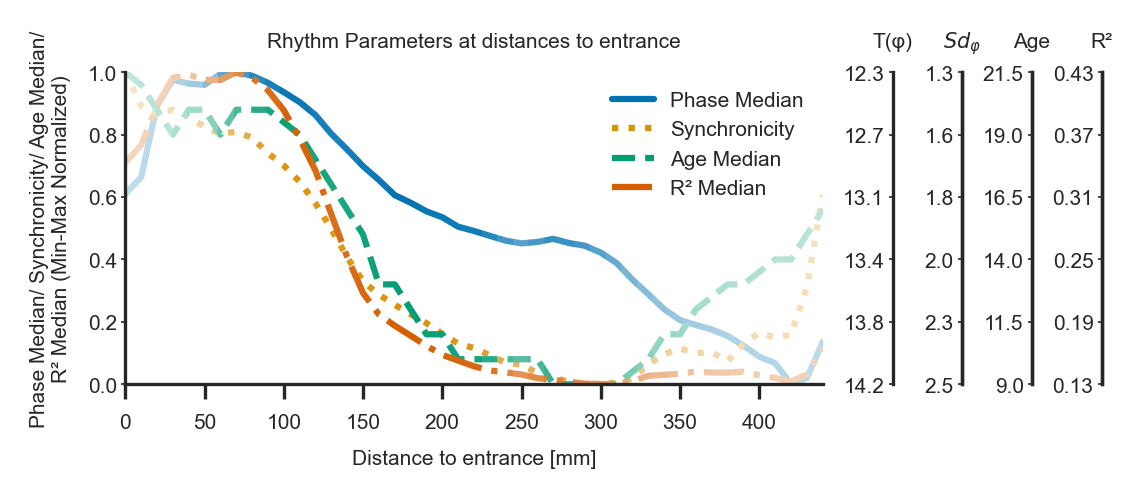

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(4.2, 1.35), gridspec_kw={"width_ratios":[1.0, 0.0, 0.0, 0.0, 0.0], "wspace": 0.5}, dpi=300)

# plot lines
sns.lineplot(dist_exit_df_2019, x="entrance_dist_median_round", y="phase_median_min_max", ax=axs[0], estimator="median", errorbar=None,
             label="Phase Median", markers=True)
sns.lineplot(dist_exit_df_2019, x="entrance_dist_median_round", y="phase_std_min_max", ax=axs[0], estimator="median",
             errorbar=None,
             label="Synchronicity", linestyle="dotted", markers=True, dashes=False)
sns.lineplot(dist_exit_df_2019, x="entrance_dist_median_round", y="age_median_min_max", ax=axs[0], estimator="median", errorbar=None,
             label="Age Median", linestyle="dashed", markers=True, dashes=False)
sns.lineplot(dist_exit_df_2019, x="entrance_dist_median_round", y="r_squared_median_min_max", ax=axs[0], estimator="median",
             errorbar=None, label="R² Median", linestyle="dashdot", markers=True, dashes=False)

# whiten out areas with low sample sizes
bb_rhythm.plotting.whiten_out_low_sample_size_areas(axs[0], dist_exit_df_2019, "entrance_dist_median_round", "count_min_max")

# x-axis settings
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(50))
axs[0].set_xlim(0, dist_exit_df_2019["entrance_dist_median_round"].max())
axs[0].set_xlabel("Distance to entrance [mm]")
axs[0].xaxis.set_major_locator(ticker.MultipleLocator(50))

# y-axis settings
axs[0].set_ylim(0, 1)
axs[0].tick_params(axis='y', which='major', pad=1)
axs[0].set_ylabel("Phase Median/ Synchronicity/ Age Median/\nR² Median (Min-Max Normalized)")

# legend settings
axs[0].legend(frameon=False, loc='upper right')

# figure settings
sns.despine(ax=axs[0])
axs[0].tick_params(which='minor', length=2)
axs[0].set_title("Rhythm Parameters at distances to entrance", fontsize=rcParams['axes.labelsize'])

# multiple axis settings
## phase
axs[1].get_xaxis().set_visible(False)
sns.despine(ax=axs[1])
axs[1].set_yticks(axs[1].get_yticks().tolist())
axs[1].set_yticklabels([np.round(i / 10 * dist_exit_df_2019["phase_focal_median"].min() + dist_exit_df_2019["phase_focal_median"].max() * (-i / 10) + dist_exit_df_2019["phase_focal_median"].max(), 1) for i in range(0, 12, 2)])
axs[1].tick_params(axis='y', which='major', pad=1)
axs[1].set_title("T(\u03C6)", fontsize=rcParams['axes.labelsize'])
axs[1].yaxis.set_label_position("right")

## phase std
axs[2].get_xaxis().set_visible(False)
axs[2].set_yticks(axs[2].get_yticks().tolist())
axs[2].set_yticklabels([np.round(i / 10 * dist_exit_df_2019["phase_focal_std"].min() + dist_exit_df_2019["phase_focal_std"].max() * (-i / 10) + dist_exit_df_2019["phase_focal_std"].max(), 1) for i in range(0, 12, 2)])
axs[2].tick_params(axis='y', which='major', pad=1)
axs[2].set_title(r"$Sd_{\varphi}$", fontsize=rcParams['axes.labelsize'])
axs[2].yaxis.set_label_position("right")

## age
axs[3].get_xaxis().set_visible(False)
axs[3].set_yticks(axs[3].get_yticks().tolist())
axs[3].set_yticklabels([np.round(-(i / 10 - 1) * dist_exit_df_2019["age_focal_median"].min() + dist_exit_df_2019["age_focal_median"].max() * (i / 10), 1) for i in range(0, 12, 2)])
axs[3].tick_params(axis='y', which='major', pad=1)
axs[3].set_title("Age", fontsize=rcParams['axes.labelsize'])
axs[3].yaxis.set_label_position("right")

## R²
axs[4].get_xaxis().set_visible(False)
axs[4].set_yticks(axs[4].get_yticks().tolist())
axs[4].set_yticklabels([np.round(-(i / 10 - 1) * dist_exit_df_2019["r_squared_focal_median"].min() + dist_exit_df_2019["r_squared_focal_median"].max() * (i / 10), 2) for i in range(0, 12, 2)])
axs[4].tick_params(axis='y', which='major', pad=1)
axs[4].set_title("R²", fontsize=rcParams['axes.labelsize'])
axs[4].yaxis.set_label_position("right")

# save figure
plt.savefig(os.path.join("imgs", "panel_1_e_2019.svg"), bbox_inches="tight")
plt.savefig(os.path.join("imgs", "panel_1_e_2019.png"), bbox_inches="tight")